In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Add path ../..


# INPUT

In [2]:
valid_cols = [
    'CARD_CREDIT_HOLD', 'CARD_CREDIT_MAX_LIMIT',
    'CARD_CREDIT_SUM_BAL_NOW', 'CASA_HOLD', 'CASA_SUM_BAL_NOW', 'CREDIT_SCORE',
    'EB_MBIB_HOLD', 'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN', 'EB_SACOMPAY_DAY_SINCE_LTST_TXN', 'EB_SACOMPAY_HOLD', 'LOR',
    'TOI_CARD_Y1', 'CASA_DAY_SINCE_LTST_TXN',
       'EB_MBIB_DAY_SINCE_ACTIVE', 'LIFE_STG_1', 'LIFE_STG_2', 'LIFE_STG_3',
       'LIFE_STG_4', 'LIFE_STG_5', 'AREA_VN0010001', 'AREA_VN0010002',
       'AREA_VN0010003', 'AREA_VN0010004', 'AREA_VN0010005', 'AREA_VN0010006',
       'AREA_VN0010007'
]

In [3]:
fis_loc = pathlib.Path('C:/Users/os-quanht190494/work/advance-analytic/fis/data/')

In [4]:
fis_loc.exists()

True

In [5]:
fis_feat_list = joblib.load(fis_loc / 'feat_list_354')

In [6]:
fis_X_train = pd.read_pickle(fis_loc /  'X_train.pkl', 'gzip')[valid_cols]
fis_y_train = pd.read_pickle(fis_loc / 'y_train.pkl', 'gzip')

In [7]:
fis_X_val = pd.read_pickle(fis_loc / 'X_val.pkl', 'gzip')[valid_cols]
fis_y_val = pd.read_pickle(fis_loc / 'y_val.pkl', 'gzip')

In [8]:
fis_X_test = pd.read_pickle(fis_loc / 'X_test.pkl', 'gzip')[valid_cols]
fis_y_test = pd.read_pickle(fis_loc / 'y_test.pkl', 'gzip')

In [9]:
fis_y_train.value_counts(normalize=True)

REACTIVATED
0    0.956128
1    0.043872
Name: proportion, dtype: float64

In [10]:
fis_y_val.value_counts(normalize=True)

REACTIVATED
0    0.970125
1    0.029875
Name: proportion, dtype: float64

In [11]:
fis_y_test.value_counts(normalize=True)

REACTIVATED
0    0.965544
1    0.034456
Name: proportion, dtype: float64

In [12]:
# fis_model = joblib.load('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/REACTIVE_CLASSIFICATION_354')

In [13]:
from xgboost import XGBClassifier
bst = XGBClassifier()
bst.fit(fis_X_train, fis_y_train)
fis_model = bst

## FIS-EVALUATE

In [14]:
fis_y_train_pred = fis_model.predict(fis_X_train)
fis_y_train_prob = fis_model.predict_proba(fis_X_train)
fis_y_val_pred = fis_model.predict(fis_X_val)
fis_y_val_prob = fis_model.predict_proba(fis_X_val)
fis_y_test_pred = fis_model.predict(fis_X_test)
fis_y_test_prob = fis_model.predict_proba(fis_X_test)

In [15]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_train, fis_y_train_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_train, fis_y_train_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.7671917688775214,
 0.10842784553262981,
 0.19000248336326567,
 0.7856733960848435,
 0.5713467921696871)

In [16]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_val, fis_y_val_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_val, fis_y_val_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.7384623564440663,
 0.1687729360585219,
 0.2747522304207632,
 0.7356634630891288,
 0.47132692617825755)

In [17]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_test, fis_y_test_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_test, fis_y_test_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.6802199633394435,
 0.12821425580031828,
 0.21576003171387043,
 0.7284323272234088,
 0.45686465444681756)

In [18]:
# fig, axs = plt.subplots(1,3, figsize=(15, 5))
# metrics.RocCurveDisplay.from_predictions(fis_y_train, fis_y_train_pred, plot_chance_level=True, ax=axs[0], color='orange')
# metrics.RocCurveDisplay.from_predictions(fis_y_val, fis_y_val_pred, plot_chance_level=True, ax=axs[1], color='orange')
# metrics.RocCurveDisplay.from_predictions(fis_y_test, fis_y_test_pred, plot_chance_level=True, ax=axs[2], color='orange')
# axs[0].set_title('ROC-AUC Train')
# axs[1].set_title('ROC-AUC Val')
# axs[2].set_title('ROC-AUC Test')
# plt.show()

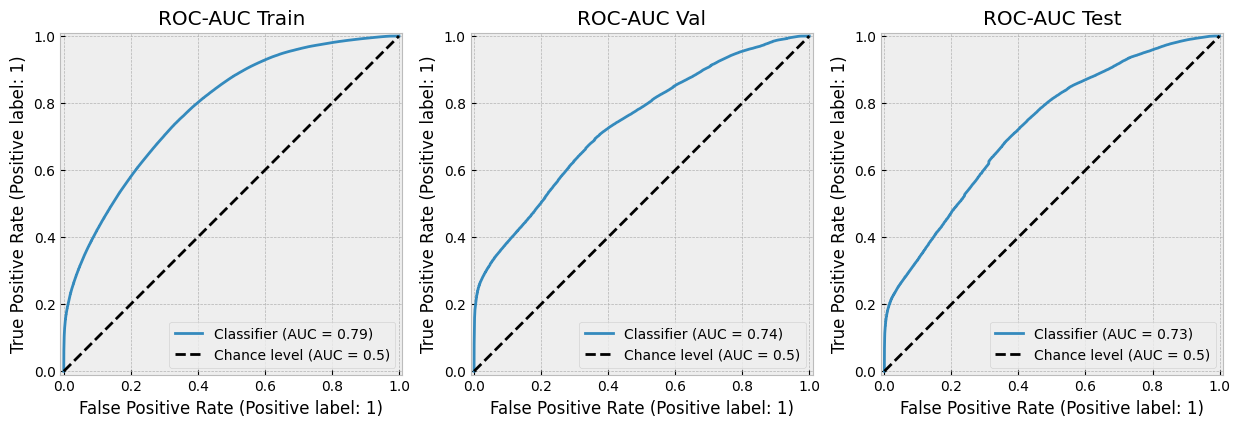

In [19]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.RocCurveDisplay.from_predictions(fis_y_train, fis_y_train_prob[:,1], plot_chance_level=True, ax=axs[0])
metrics.RocCurveDisplay.from_predictions(fis_y_val, fis_y_val_prob[:,1], plot_chance_level=True, ax=axs[1])
metrics.RocCurveDisplay.from_predictions(fis_y_test, fis_y_test_prob[:,1], plot_chance_level=True, ax=axs[2])
axs[0].set_title('ROC-AUC Train')
axs[1].set_title('ROC-AUC Val')
axs[2].set_title('ROC-AUC Test')
plt.show()

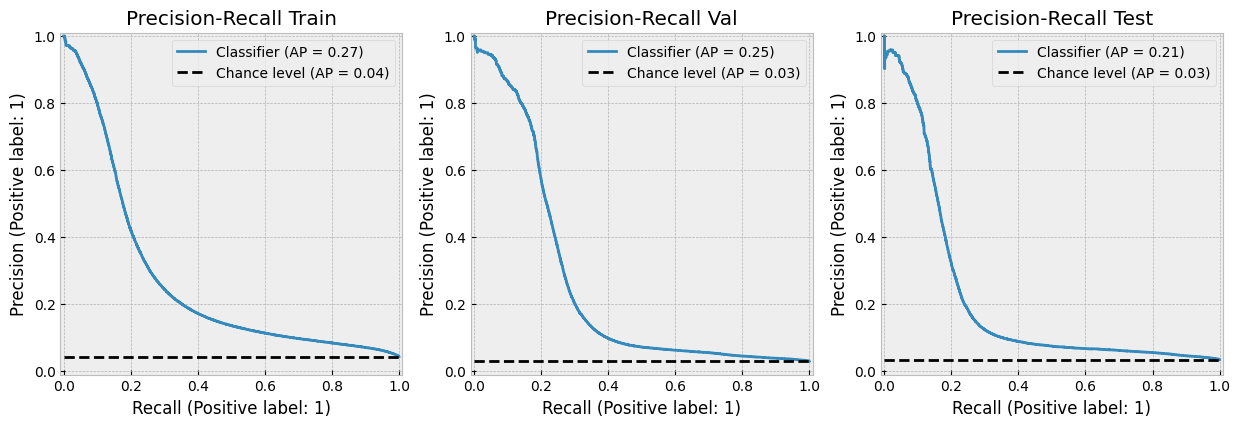

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.PrecisionRecallDisplay.from_predictions(fis_y_train, fis_y_train_prob[:,1], plot_chance_level=True, ax=axs[0])
metrics.PrecisionRecallDisplay.from_predictions(fis_y_val, fis_y_val_prob[:,1], plot_chance_level=True, ax=axs[1])
metrics.PrecisionRecallDisplay.from_predictions(fis_y_test, fis_y_test_prob[:,1], plot_chance_level=True, ax=axs[2])
axs[0].set_title('Precision-Recall Train')
axs[1].set_title('Precision-Recall Val')
axs[2].set_title('Precision-Recall Test')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
plt.show()

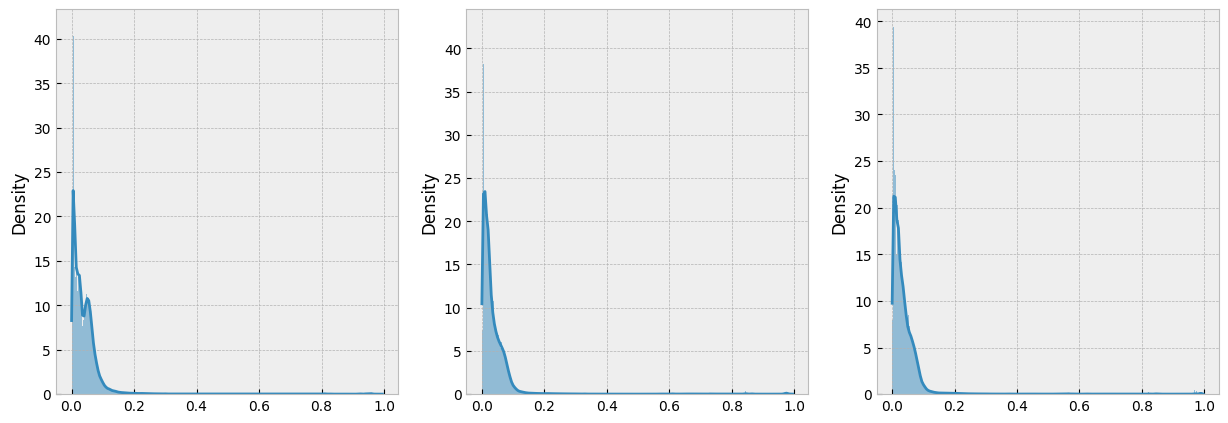

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(fis_y_train_prob[:,1], ax=axs[0], stat='density', kde=True)
sns.histplot(fis_y_val_prob[:,1], ax=axs[1], stat='density', kde=True)
sns.histplot(fis_y_test_prob[:,1], ax=axs[2], stat='density', kde=True)
plt.show()

In [22]:
# phan bo deu va giong nhau, kha nang cao rang deploy ra dung du doan

In [23]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    # dfl = pd.melt(df, id_vars='threshold', value_vars=['precision', 'recall', 'f1-score'], var_name='metric', value_name='value')
    # ax = sns.lineplot(dfl, x='threshold', y='value',hue='metric')
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

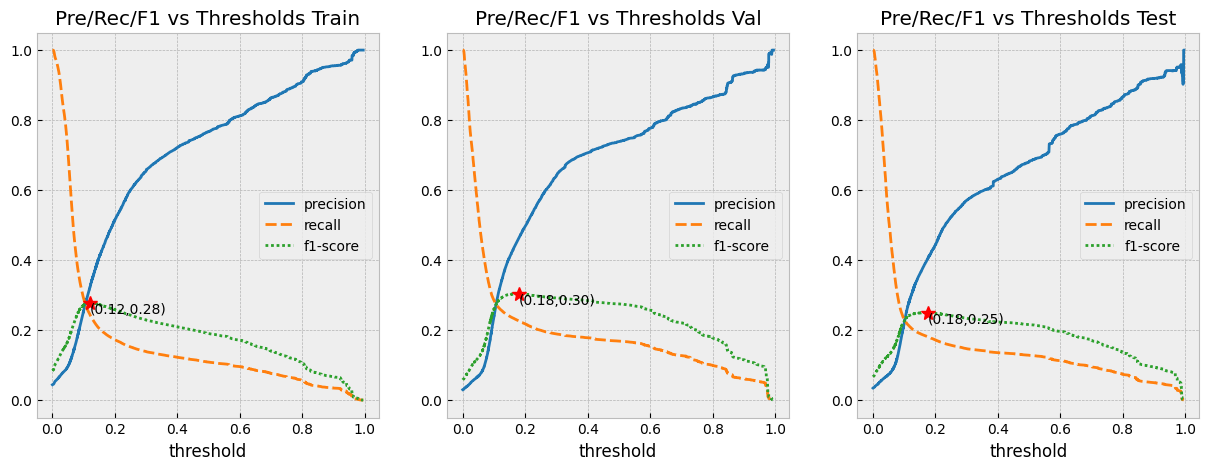

In [24]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
plot_precision_recall_with_thresholds(fis_y_train, fis_y_train_prob[:,1], ax=axs[0])
plot_precision_recall_with_thresholds(fis_y_val, fis_y_val_prob[:,1], ax=axs[1])
plot_precision_recall_with_thresholds(fis_y_test, fis_y_test_prob[:,1], ax=axs[2])
axs[0].set_title('Pre/Rec/F1 vs Thresholds Train')
axs[1].set_title('Pre/Rec/F1 vs Thresholds Val')
axs[2].set_title('Pre/Rec/F1 vs Thresholds Test')
plt.show()

In [25]:
print(metrics.classification_report(fis_y_train, fis_y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98   5305503
           1       0.77      0.11      0.19    243443

    accuracy                           0.96   5548946
   macro avg       0.86      0.55      0.58   5548946
weighted avg       0.95      0.96      0.94   5548946



In [26]:
print(metrics.classification_report(fis_y_val, fis_y_val_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   2672333
           1       0.74      0.17      0.27     82294

    accuracy                           0.97   2754627
   macro avg       0.86      0.58      0.63   2754627
weighted avg       0.97      0.97      0.97   2754627



In [27]:
print(metrics.classification_report(fis_y_test, fis_y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98   2676494
           1       0.68      0.13      0.22     95512

    accuracy                           0.97   2772006
   macro avg       0.82      0.56      0.60   2772006
weighted avg       0.96      0.97      0.96   2772006



## FEATURE IMPORTANCE

<Axes: >

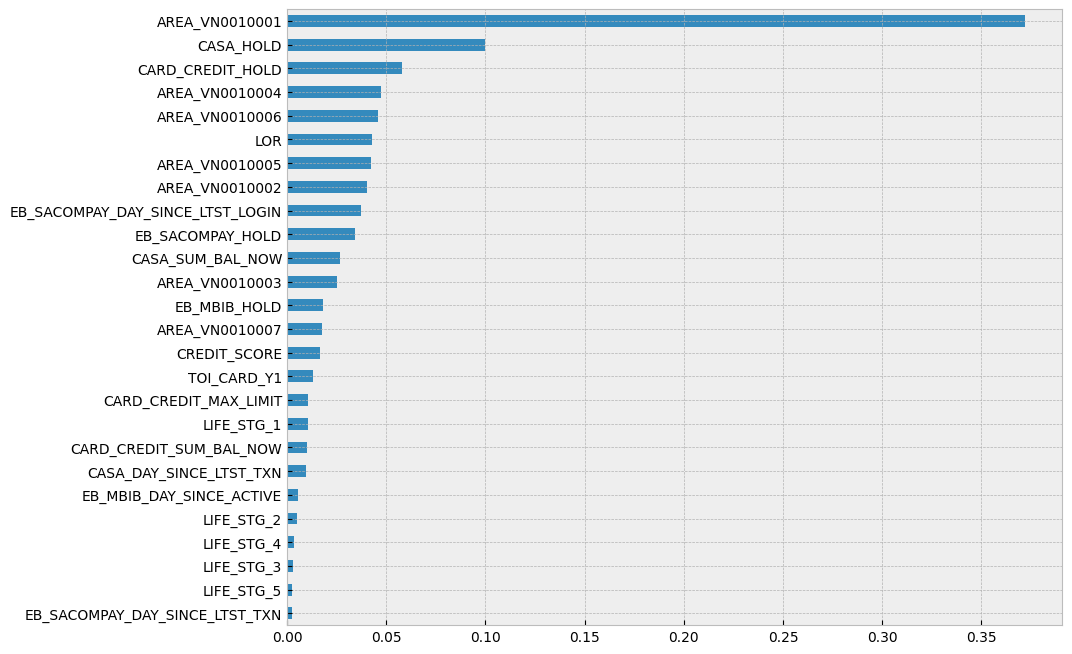

In [28]:
featimp_series = pd.Series(fis_model.feature_importances_, index=valid_cols)
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [29]:
feat_aly = featimp_series.nlargest(10)
feat_aly

AREA_VN0010001                      0.372093
CASA_HOLD                           0.099892
CARD_CREDIT_HOLD                    0.058043
AREA_VN0010004                      0.047578
AREA_VN0010006                      0.045596
LOR                                 0.042684
AREA_VN0010005                      0.042050
AREA_VN0010002                      0.040366
EB_SACOMPAY_DAY_SINCE_LTST_LOGIN    0.037475
EB_SACOMPAY_HOLD                    0.034384
dtype: float32

# PREDICTION

## PRED-1

In [31]:
pred_ds1 = pd.read_pickle(fis_loc / '01-10-2022_pred_dataset.pkl', 'gzip')
pred_ds2 = pd.read_pickle(fis_loc / '01-11-2022_pred_dataset.pkl', 'gzip')
pred_ds3 = pd.read_pickle(fis_loc / '16-01-2023_pred_dataset.pkl', 'gzip')

In [32]:
len(pred_ds1), len(pred_ds2), len(pred_ds3)

(2772006, 2794298, 1094257)

In [33]:
pred_ds1 = pred_ds1.set_index(['RPT_DT', 'CUSTOMER_CDE'])[valid_cols]

In [34]:
ds1_pred = fis_model.predict(pred_ds1)

In [35]:
ds1_prob = fis_model.predict_proba(pred_ds1)

In [36]:
tmp = ds1_prob[:,1]

In [37]:
pd.Series(ds1_pred).value_counts()

0    2753969
1      18037
Name: count, dtype: int64

<Axes: ylabel='count'>

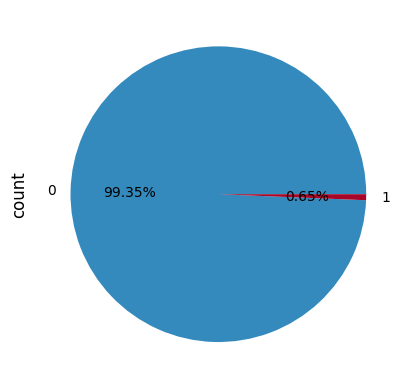

In [38]:
pd.Series(ds1_pred).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='Count'>

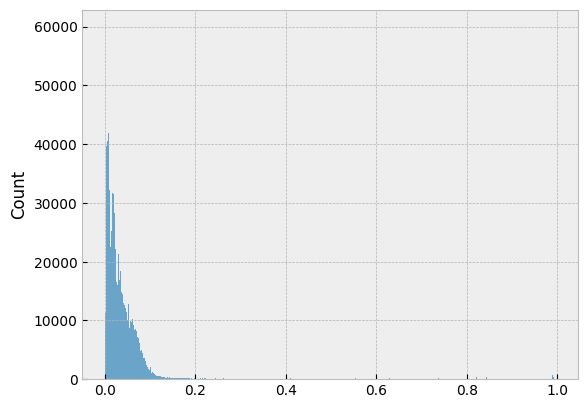

In [39]:
sns.histplot(tmp)

## PRED-2

In [40]:
pred_ds2 = pred_ds2.set_index(['RPT_DT', 'CUSTOMER_CDE'])[valid_cols]

In [41]:
ds2_pred = fis_model.predict(pred_ds2)

In [42]:
ds2_prob = fis_model.predict_proba(pred_ds2)

In [43]:
pd.Series(ds2_pred).value_counts()

0    2779841
1      14457
Name: count, dtype: int64

<Axes: ylabel='count'>

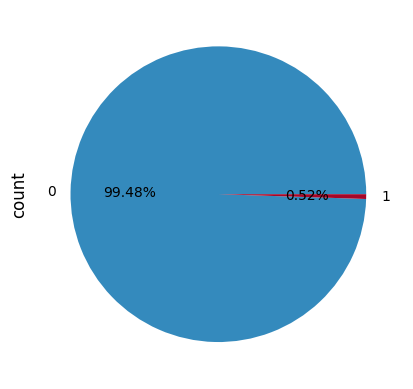

In [44]:
pd.Series(ds2_pred).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='Count'>

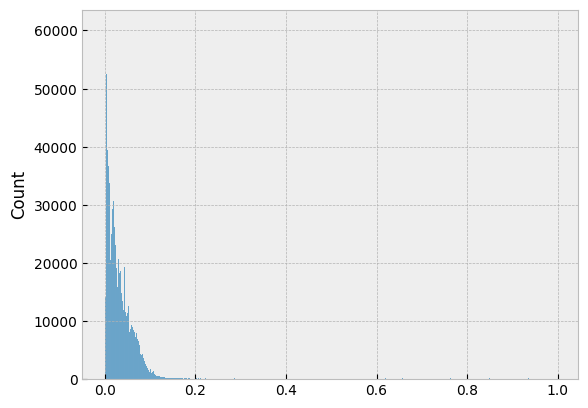

In [45]:
sns.histplot(ds2_prob[:,1])

## PRED-3

In [46]:
pred_ds3 = pred_ds3.set_index(['RPT_DT', 'CUSTOMER_CDE'])[valid_cols]

In [47]:
ds3_pred = fis_model.predict(pred_ds3)

In [48]:
ds3_prob = fis_model.predict_proba(pred_ds3)

In [49]:
pd.Series(ds3_pred).value_counts()

0    1086351
1       7906
Name: count, dtype: int64

<Axes: ylabel='count'>

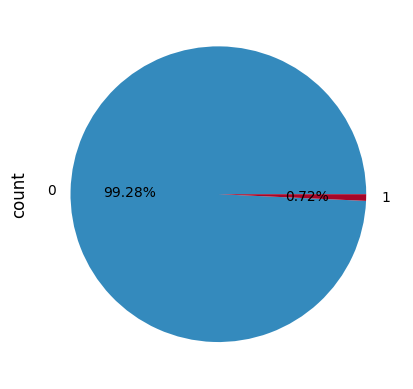

In [50]:
pd.Series(ds3_pred).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='Count'>

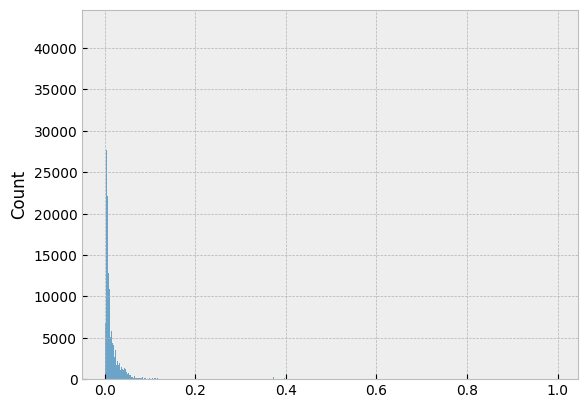

In [51]:
sns.histplot(ds3_prob[:,1])